![](https://brand.infojobs.net/downloads/ij-logo_default/ij-logo-default_primary.jpg)

Explicacion de infojobs y del trabajo en general

In [88]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from helper_functions import take_value_from_dict, transform_salary_float, plot_salary_outliers, update_salary_range, plot_salary_heatmap

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/eric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# Set the data directory
data_dir = os.path.join('..', 'data')

# Read the csv files
df_jobs = pd.read_csv(os.path.join(data_dir, 'jobs_dataset.csv'))
df_countries = pd.read_csv(os.path.join(data_dir, 'country_dataset.csv'))
df_provinces = pd.read_csv(os.path.join(data_dir, 'province_dataset.csv'))

In [90]:
# Show all columns
pd.set_option('display.max_columns', None)

df_jobs.head()

,id,title,province,city,link,category,contractType,subcategory,salaryMin,salaryMax,salaryPeriod,experienceMin,workDay,study,teleworking,published,updated,author,requirementMin,bold,applications,subSegment,executive,salaryDescription,multiProvince,urgent,color
0,948c2d14684cdca15045da2e35d855,Jefe de Proyecto Java / PHP (Grado IT),"{'id': 33, 'value': 'Madrid'}",Madrid,https://www.infojobs.net/madrid/jefe-proyecto-...,"{'id': 150, 'value': 'Informática y telecomuni...","{'id': 1, 'value': 'Indefinido'}","{'id': 3110, 'value': 'Gestión de proyectos'}","{'id': 420, 'value': '44.000 €'}","{'id': 440, 'value': '50.000 €'}","{'id': 3, 'value': 'Bruto/año'}","{'id': 5, 'value': 'Más de 5 años'}","{'id': 1, 'value': 'Completa'}","{'id': 120, 'value': 'Ingeniería Técnica'}","{'id': 3, 'value': 'Híbrido'}",2023-06-05T21:42:02.000Z,2023-06-05T21:42:02.000Z,"{'id': '9b37c0dbf84572afbd6ab8a3e49678', 'priv...",¿Qué debes saber?\n\n- Metodologías ágiles: Sc...,False,0,31,True,44.000€ - 50.000€ Bruto/año,False,False,False
1,fd5278c9354779a545b820ac97cf05,Cocinero/a,"{'id': 49, 'value': 'Valencia/València'}",Bocairent,https://www.infojobs.net/bocairent/cocinero/of...,"{'id': 160, 'value': 'Turismo y restauración'}","{'id': 1, 'value': 'Indefinido'}","{'id': 3115, 'value': 'Hostelería'}","{'id': 1090, 'value': '1.300 €'}","{'id': 1130, 'value': '1.900 €'}","{'id': 2, 'value': 'Bruto/mes'}","{'id': 2, 'value': 'Al menos 1 año'}","{'id': 1, 'value': 'Completa'}","{'id': 35, 'value': 'Ciclo Formativo Grado Med...","{'id': 1, 'value': 'Presencial'}",2023-05-30T11:06:30.000Z,2023-06-05T21:37:27.000Z,{'id': '50485249495110177105105023304515501868...,NaN,False,0,11,False,1.300€ - 1.900€ Bruto/mes,False,False,False
2,12c32368e64b2b8cac770083b49452,Odontólogo/a,"{'id': 22, 'value': 'Guadalajara'}",Guadalajara,https://www.infojobs.net/guadalajara/odontolog...,"{'id': 140, 'value': 'Sanidad y salud'}","{'id': 1, 'value': 'Indefinido'}","{'id': 3140, 'value': 'Odontología'}","{'id': 1070, 'value': '1.050 €'}","{'id': 170, 'value': '1.800 €'}","{'id': 2, 'value': 'Bruto/mes'}","{'id': 3, 'value': 'Al menos 3 años'}","{'id': 5, 'value': 'Parcial - Indiferente'}","{'id': 140, 'value': 'Licenciatura'}","{'id': 1, 'value': 'Presencial'}",2023-06-05T21:32:09.000Z,2023-06-05T21:32:09.000Z,{'id': '98565348555048797869866023058422609649...,NaN,False,0,22,False,1.050€ - 1.800€ Bruto/mes,False,False,False
3,d8727e153b4a4db0e369fb25e49533,Camarero/a de barra,"{'id': 40, 'value': 'Pontevedra'}",A Illa de Arousa,https://www.infojobs.net/a-illa-de-arousa/cama...,"{'id': 160, 'value': 'Turismo y restauración'}","{'id': 9, 'value': 'Fijo discontinuo'}","{'id': 3115, 'value': 'Hostelería'}","{'id': 150, 'value': '1.200 €'}","{'id': 160, 'value': '1.500 €'}","{'id': 2, 'value': 'Bruto/mes'}","{'id': 2, 'value': 'Al menos 1 año'}","{'id': 10, 'value': 'Indiferente'}","{'id': 20, 'value': 'Educación Secundaria Obli...","{'id': 1, 'value': 'Presencial'}",2023-05-29T21:26:06.000Z,2023-06-05T21:30:03.000Z,{'id': '98485755535156658269793023115726808674...,NaN,False,0,11,False,1.200€ - 1.500€ Bruto/mes,False,False,False
4,8fba30d3694294bfaee1a6db9a2500,MECANICO EBIKES,"{'id': 41, 'value': 'Salamanca'}",Santa Marta de Tormes,https://www.infojobs.net/santa-marta-de-tormes...,"{'id': 180, 'value': 'Otros'}","{'id': 5, 'value': 'Otros contratos'}","{'id': 3123, 'value': 'Sin especificar'}","{'id': 0, 'value': ''}","{'id': 0, 'value': ''}","{'id': 0, 'value': ''}","{'id': 3, 'value': 'Al menos 3 años'}","{'id': 1, 'value': 'Completa'}","{'id': 30, 'value': 'Formación Profesional Gra...","{'id': 1, 'value': 'Presencial'}",2023-05-22T20:39:08.000Z,2023-06-05T21:30:03.000Z,{'id': '98484955504851836578835023228061805884...,NaN,False,0,11,False,Salario no disponible,False,False,False


In [91]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59049 entries, 0 to 59048
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 59049 non-null  object
 1   title              59049 non-null  object
 2   province           59049 non-null  object
 3   city               59049 non-null  object
 4   link               59049 non-null  object
 5   category           59049 non-null  object
 6   contractType       59049 non-null  object
 7   subcategory        59049 non-null  object
 8   salaryMin          59049 non-null  object
 9   salaryMax          59049 non-null  object
 10  salaryPeriod       59049 non-null  object
 11  experienceMin      59049 non-null  object
 12  workDay            59049 non-null  object
 13  study              59049 non-null  object
 14  teleworking        55298 non-null  object
 15  published          59049 non-null  object
 16  updated            59049 non-null  objec

In [92]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      204 non-null    int64 
 1   value   204 non-null    object
 2   order   204 non-null    int64 
 3   key     204 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.5+ KB


In [93]:
df_provinces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      944 non-null    int64 
 1   value   944 non-null    object
 2   order   944 non-null    int64 
 3   key     944 non-null    object
 4   parent  944 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 37.0+ KB


## Data Cleaning

In [94]:
df_clean = (df_jobs
 .drop_duplicates()
 .assign(
    province_id=lambda df: df.province.apply(take_value_from_dict, key='id'),
    province=lambda df: df.province.map(take_value_from_dict),
    category=lambda df: df.category.map(take_value_from_dict),
    subcategory=lambda df: df.subcategory.map(take_value_from_dict),
    contractType=lambda df: df.contractType.map(take_value_from_dict),
    teleworking=lambda df: df.teleworking.map(take_value_from_dict),
    salaryMin=lambda df: df.salaryMin.map(transform_salary_float),
    salaryMax=lambda df: df.salaryMax.map(transform_salary_float),
    salaryPeriod=lambda df: df.salaryPeriod.map(take_value_from_dict),
    author=lambda df: df.author.apply(lambda value: take_value_from_dict(value, key='name')),
    published = lambda df: pd.to_datetime(df.published).dt.tz_localize(None),
 )
.dropna(subset=['salaryMin', 'salaryMax', 'teleworking'])
.merge(df_provinces, how='left', left_on='province_id', right_on='id')
.merge(df_countries, how='left', left_on='parent', right_on='id')
.rename(columns={ 'value_y': 'country', 'id_x': 'job_id' })
.query('country == "España"')
.filter(
        [
            'title',
            'value_y',
            'province',
            'category',
            'subcategory',
            'contractType',
            'teleworking',
            'salaryMin',
            'salaryMax',
            'salaryPeriod',
            'author',
            'published'
        ])
.apply(update_salary_range, axis=1)
.reset_index(drop=True)
)

In [95]:
df_clean.head()

,title,province,category,subcategory,contractType,teleworking,salaryMin,salaryMax,salaryPeriod,author,published
0,Jefe de Proyecto Java / PHP (Grado IT),Madrid,Informática y telecomunicaciones,Gestión de proyectos,Indefinido,Híbrido,44000.0,50000.0,Bruto/año,ENTELGY - Zona Madrid,2023-06-05 21:42:02
1,Cocinero/a,Valencia/València,Turismo y restauración,Hostelería,Indefinido,Presencial,15600.0,22800.0,Bruto/mes,Miguel Vaño Silvestre,2023-05-30 11:06:30
2,Odontólogo/a,Guadalajara,Sanidad y salud,Odontología,Indefinido,Presencial,12600.0,21600.0,Bruto/mes,ONEVEN MEDICA SL.,2023-06-05 21:32:09
3,Camarero/a de barra,Pontevedra,Turismo y restauración,Hostelería,Fijo discontinuo,Presencial,14400.0,18000.0,Bruto/mes,AREOSO FUN SOCIEDAD LIMITADA.,2023-05-29 21:26:06
4,Detective Privado Dependiente,Madrid,"Profesiones, artes y oficios",Seguridad y vigilancia,Indefinido,Presencial,19200.0,24000.0,Bruto/mes,GRUPO INVESTIBERICA SL.,2023-05-15 20:15:23


In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23638 entries, 0 to 23637
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         23638 non-null  object        
 1   province      23638 non-null  object        
 2   category      23638 non-null  object        
 3   subcategory   23638 non-null  object        
 4   contractType  23638 non-null  object        
 5   teleworking   23638 non-null  object        
 6   salaryMin     23638 non-null  float64       
 7   salaryMax     23638 non-null  float64       
 8   salaryPeriod  23638 non-null  object        
 9   author        23638 non-null  object        
 10  published     23638 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 2.0+ MB


In [97]:
df_clean.describe()

,salaryMin,salaryMax,published
count,23638.000000,23638.000000,23638
mean,19928.964083,26160.634741,2023-05-17 23:30:15.413909760
min,3.000000,12.000000,2023-01-18 13:01:07
25%,15000.000000,18000.000000,2023-05-08 12:19:25.500000
50%,18000.000000,23000.000000,2023-05-23 14:18:00
75%,24000.000000,30000.000000,2023-05-31 07:26:35
max,252000.000000,288000.000000,2023-06-05 21:42:02
std,8135.093392,14753.968734,NaN


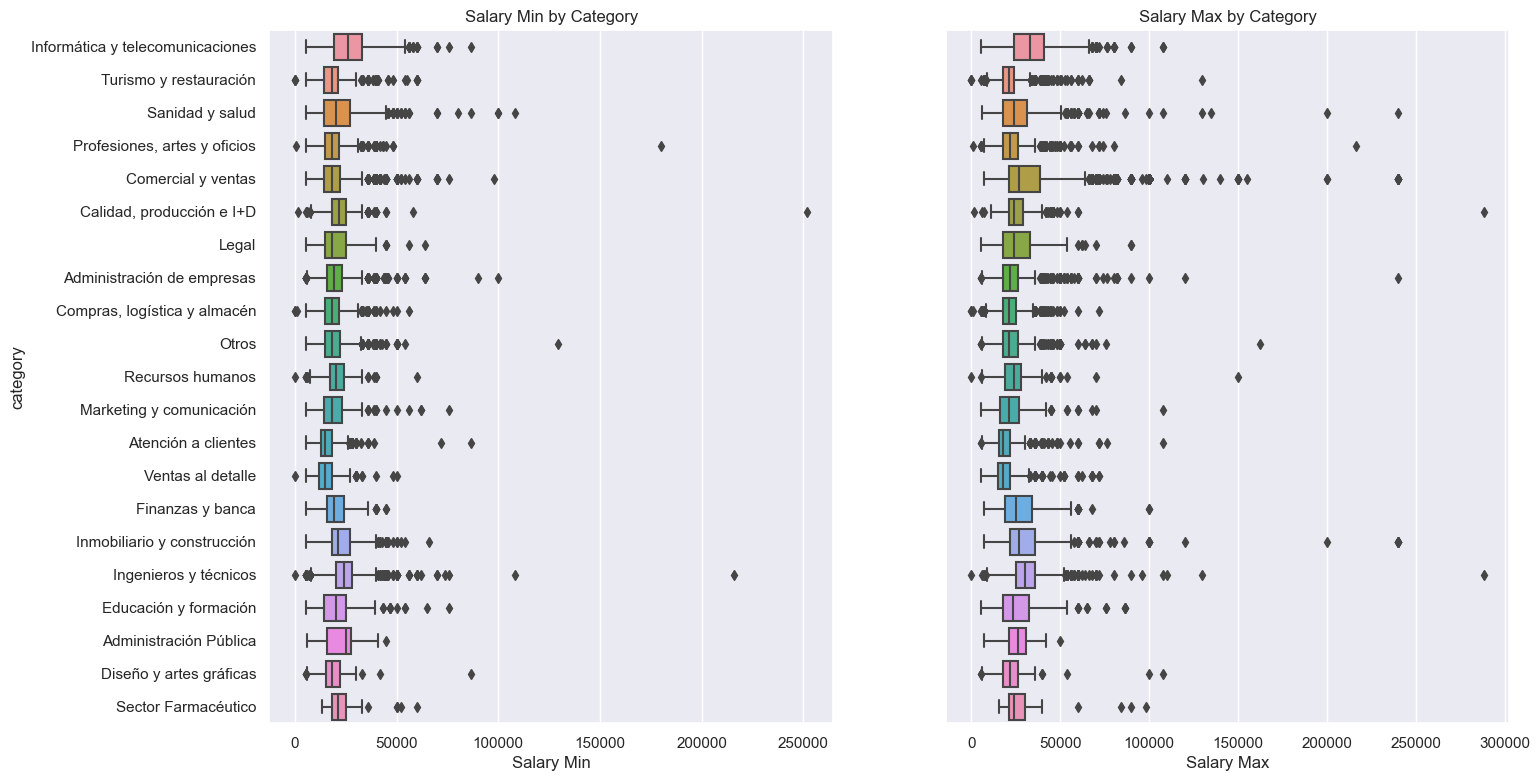

In [98]:
plot_salary_outliers(df_clean)

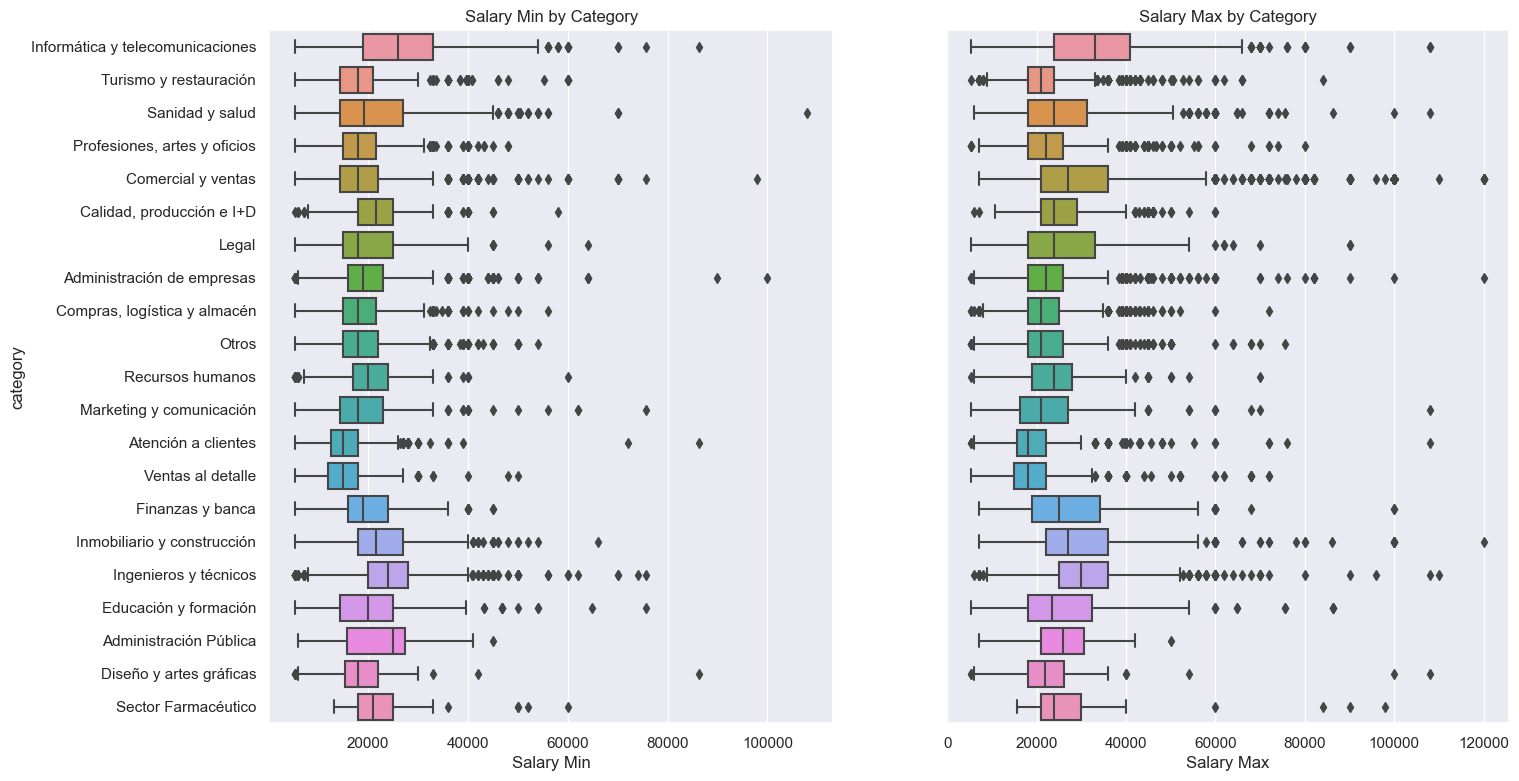

In [99]:
df_final = (df_clean
    .assign(
        IQR = lambda df: df.salaryMin.quantile(0.75) - df.salaryMin.quantile(0.25),
    )
    .query(
        'salaryMin.between(salaryMin.quantile(0.25) - 1.5*IQR, salaryMin.quantile(0.75) + 10*IQR)  \
        & salaryMax.between(salaryMax.quantile(0.25) - 1.5*IQR, salaryMax.quantile(0.75) + 10*IQR)'
        )
    .drop(columns=['IQR'])
)

plot_salary_outliers(df_final)

In [100]:
df_final.describe()

,salaryMin,salaryMax,published
count,23591.000000,23591.000000,23591
mean,19889.949557,25906.133695,2023-05-17 23:36:35.443134976
min,5400.000000,5400.000000,2023-01-18 13:01:07
25%,15000.000000,18000.000000,2023-05-08 12:22:21
50%,18000.000000,23000.000000,2023-05-23 14:19:00
75%,24000.000000,30000.000000,2023-05-31 07:26:19.500000
max,108000.000000,120000.000000,2023-06-05 21:42:02
std,7697.920550,12960.310206,NaN


# Analisis

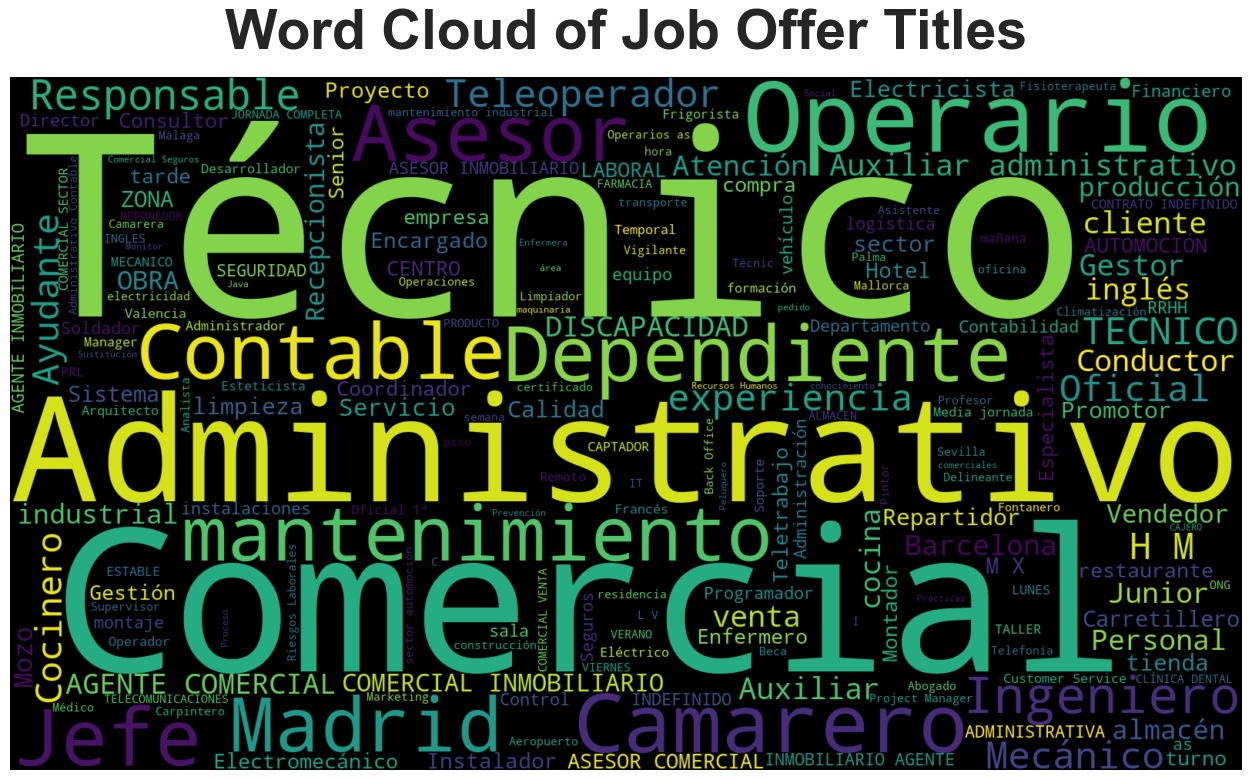

In [101]:
text = " ".join(title for title in df_clean.title)

spanish_stopwords = set(stopwords.words('spanish'))

wordcloud = WordCloud(width=1600, height=900,
     stopwords=spanish_stopwords).generate(text)

# Create a figure and axes with figsize=(16,9)
fig, ax = plt.subplots(figsize=(16,9))

# Add the word cloud to the plot
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Add a title
ax.set_title('Word Cloud of Job Offer Titles', fontdict={'fontsize': 40, 'fontweight': 'bold'}, pad=20)

# Show the plot
plt.show()

<Axes: title={'center': 'Salary Trends over Days'}, xlabel='Date', ylabel='Salary (€)'>

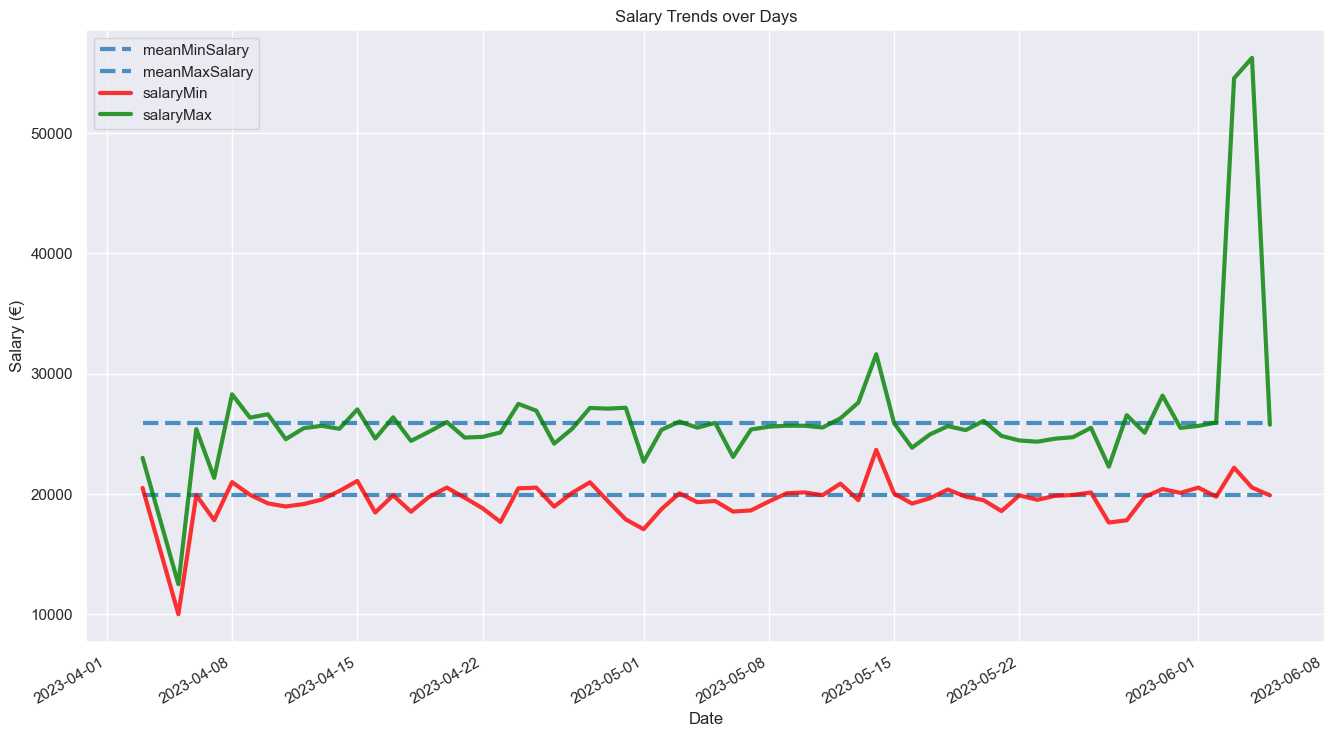

In [102]:
(df_final
 .assign(
        date=lambda df: df.published.dt.date.astype('datetime64[ns]'),
        meanMinSalary=lambda df: df.salaryMin.mean(),
        meanMaxSalary=lambda df: df.salaryMax.mean(),
 )
 .query('date > "2023-04-01"')
 .groupby('date')
    .agg(
        salaryMin=('salaryMin', 'mean'),
        salaryMax=('salaryMax', 'mean'),
        meanMinSalary=('meanMinSalary', 'mean'),
        meanMaxSalary=('meanMaxSalary', 'mean'),
    )
    .plot(       
        y=['meanMinSalary', 'meanMaxSalary', 'salaryMin', 'salaryMax'],  
        linewidth=3,
        alpha=0.8,
        # set equal colors for meanminsalary and meanmaxsalary
        color=['#1f77b4', '#1f77b4', 'red', 'green'],
        # set line styles
        style=['--', '--', '-', '-'],
        figsize=(16,9),
        title='Salary Trends over Days',
        xlabel='Date',
        ylabel='Salary (€)'
    )
)

In [103]:
correlation = df_final.corr(numeric_only=True)
correlation

,salaryMin,salaryMax
salaryMin,1.000000,0.664625
salaryMax,0.664625,1.000000


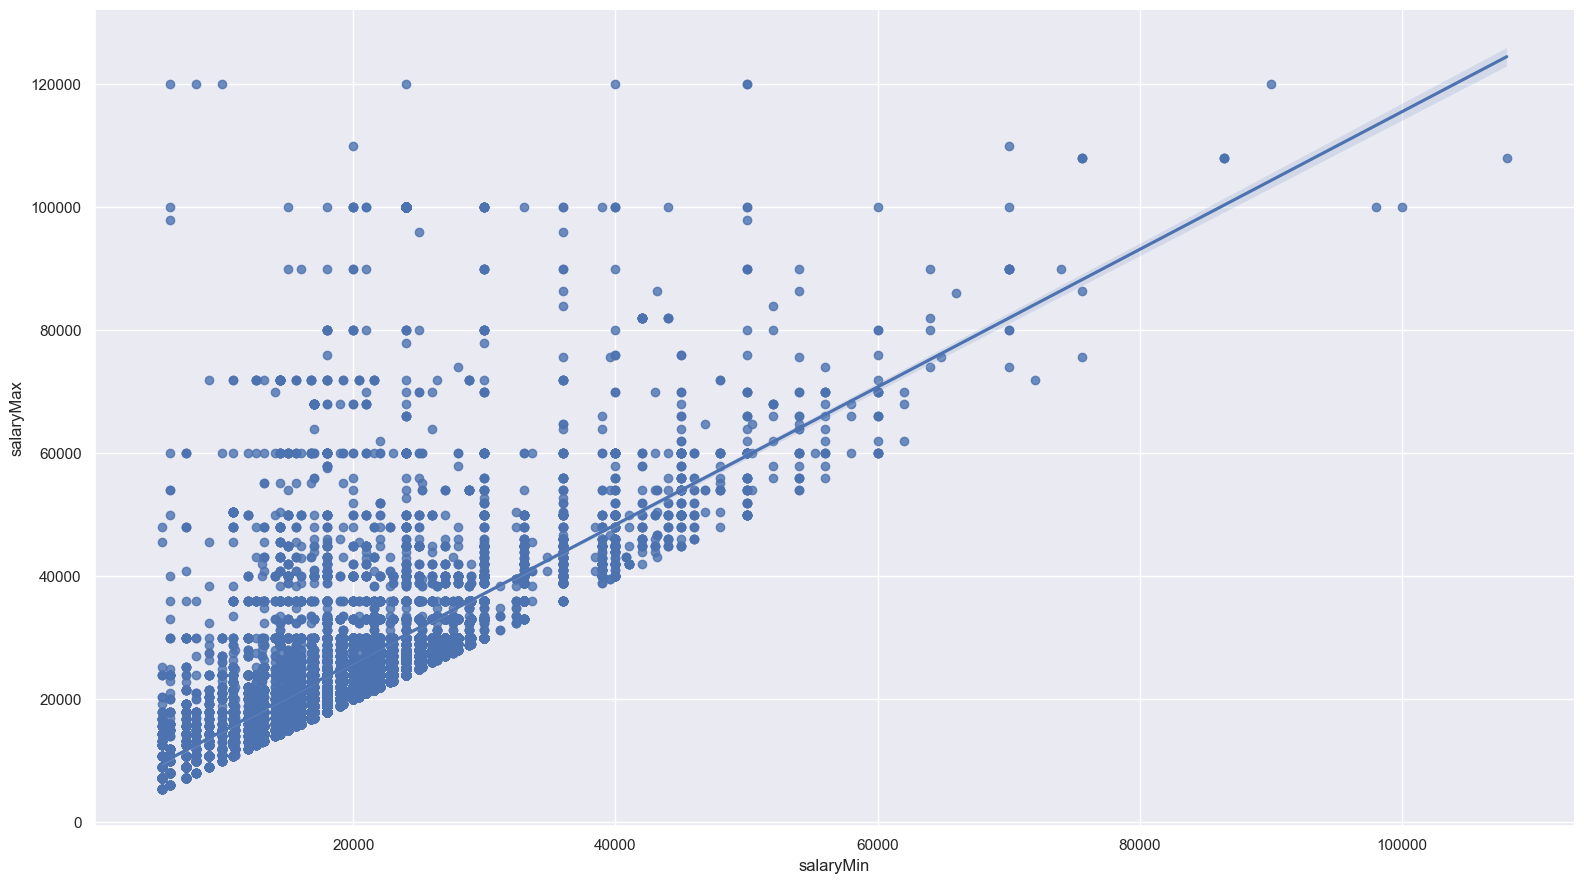

In [104]:
sns.lmplot(x='salaryMin', y='salaryMax', data=df_final, height=9, aspect=16/9)

<Axes: title={'center': 'Amount of Offers per Day'}, xlabel='Date', ylabel='Amount of Offers'>

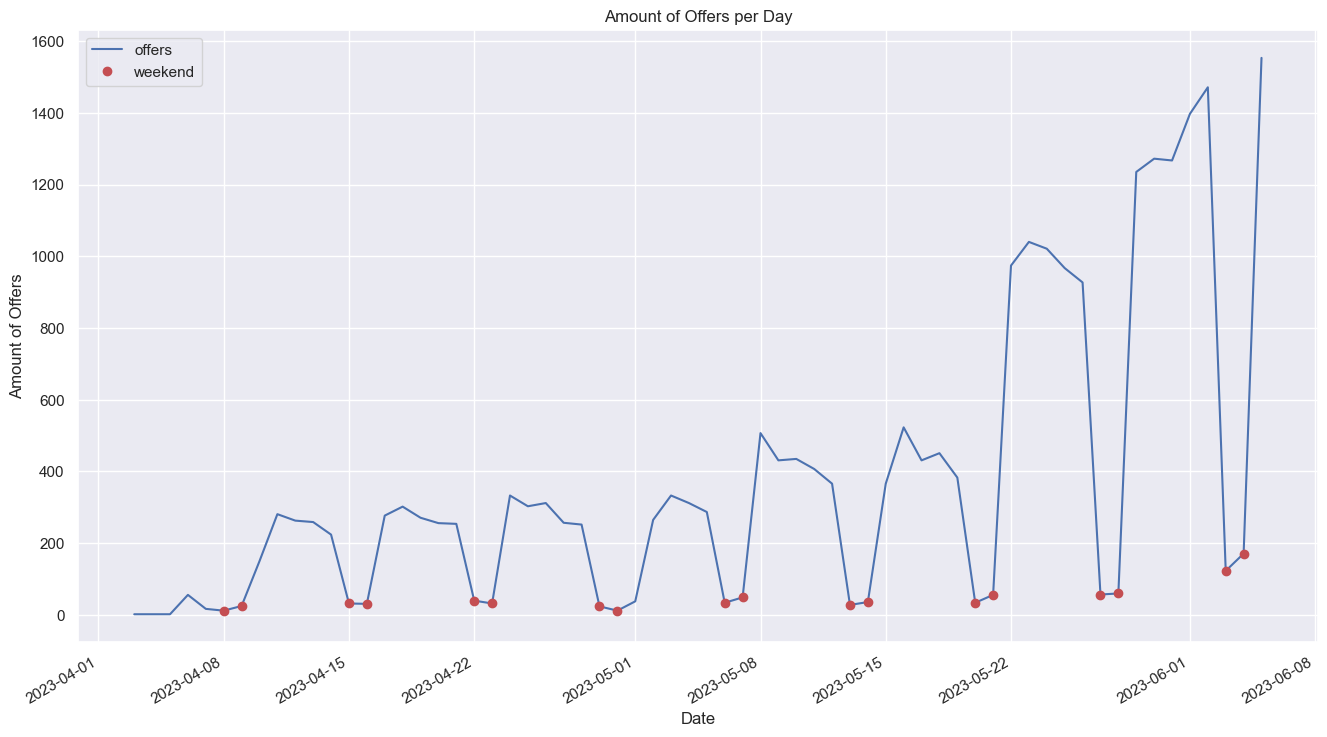

In [105]:
(df_final
    .assign(
        date=lambda df: df.published.dt.date.astype('datetime64[ns]')
    )
    .query('date > "2023-04-01"')
    .groupby('date', as_index=False)
    .agg(
        offers=('title', 'count'),
    )
    .assign(
        weekend = lambda df: df.apply(lambda x: x.offers if x.date.dayofweek > 4 else None, axis=1)
    )
    .plot(
        x='date',
        y=['offers', 'weekend'],
        style=['-', 'ro'],
        figsize=(16,9),
        title='Amount of Offers per Day',
        xlabel='Date',
        ylabel='Amount of Offers'
    )
)

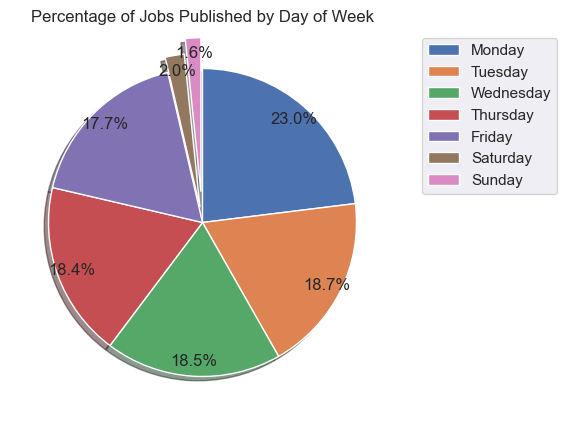

In [106]:
(df_final
    .assign(day_of_week=lambda df: df.published.dt.day_name())
    .groupby('day_of_week')
    .title
    .count()
    .sort_values(ascending=False)
    .plot(
        kind='pie', 
        figsize=(10, 5), 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True, 
        explode=[0, 0, 0, 0, 0, 0.1, 0.2],
        title='Percentage of Jobs Published by Day of Week',
        ylabel='',
        labels=None,
        pctdistance=0.9,
        counterclock=False
    )
    .legend(
        bbox_to_anchor=(1.05, 1), 
        loc='best', 
        labels=[
            'Monday', 
            'Tuesday', 
            'Wednesday', 
            'Thursday', 
            'Friday', 
            'Saturday', 
            'Sunday'
            ]
        )
)


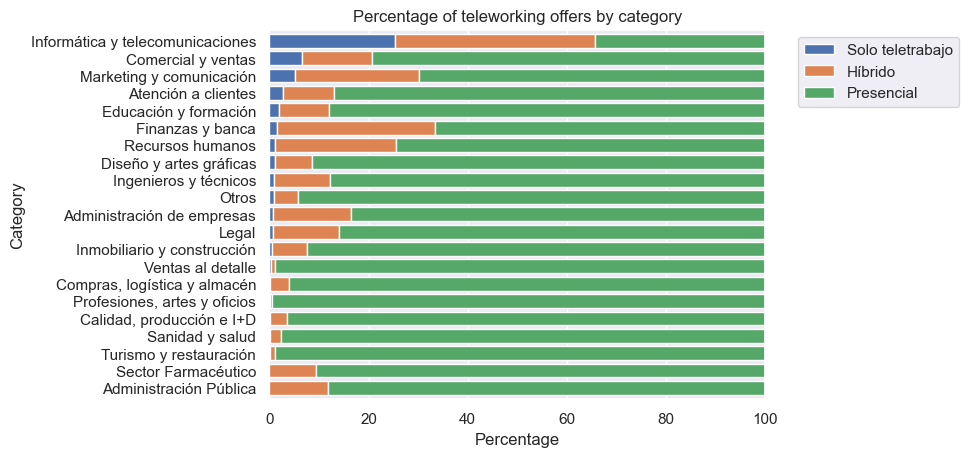

In [107]:
(df_final
 .groupby('category')
 .teleworking
 .value_counts(normalize=True)
 .mul(100)
 .unstack()
 .fillna(0)
 .sort_values(by='Solo teletrabajo', ascending=True)
 .reindex(columns=['Solo teletrabajo', 'Híbrido', 'Presencial'])
 .plot(
        kind='barh', 
        stacked=True, 
        title='Percentage of teleworking offers by category',
        xlabel='Percentage',
        ylabel='Category',
        xlim=(0, 100),
        width=0.8,
    )
 .legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 )

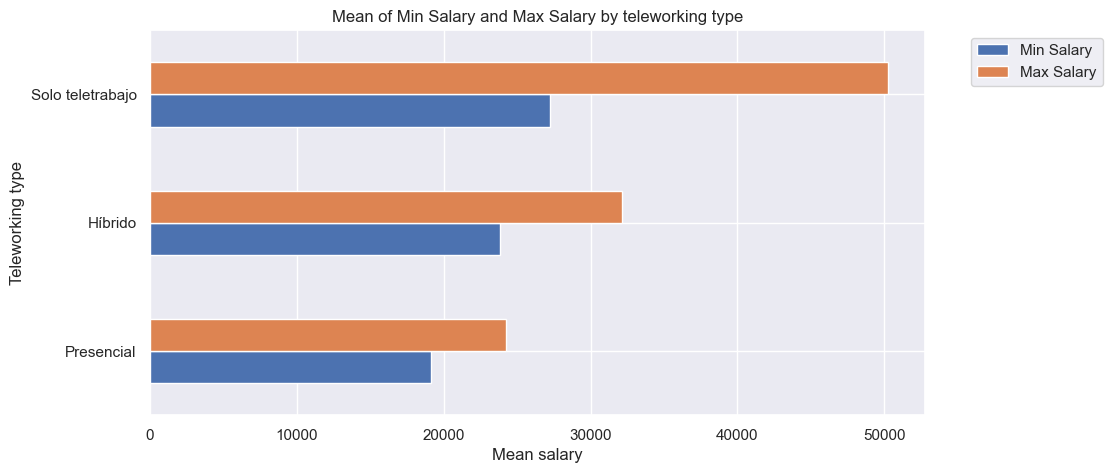

In [108]:
(df_final
    .groupby('teleworking')
    .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean'
        }
    )
    .sort_values(by='salaryMin', ascending=True)
    .rename(columns={
                'salaryMin': 'Min Salary', 
                'salaryMax': 'Max Salary'
                }
            )
    .plot(
        kind='barh', 
        title='Mean of Min Salary and Max Salary by teleworking type',
        xlabel='Mean salary',
        ylabel='Teleworking type',
        figsize=(10,5)
        )
    .legend(bbox_to_anchor=(1.05, 1), loc='upper left')
)


<Axes: title={'center': 'Mean of Min Salary and Max Salary by Category'}, xlabel='Category', ylabel='Mean of Salaries'>

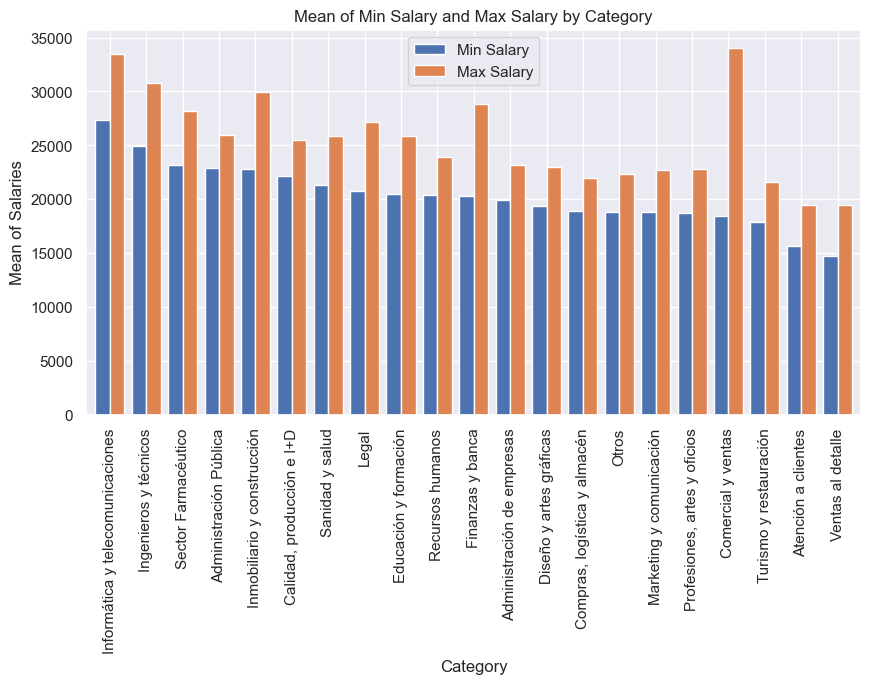

In [109]:
(df_final
        .groupby('category')
        .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean'
        }
        )
        .sort_values('salaryMin', ascending=False)
        .rename(columns={
                'salaryMin': 'Min Salary', 
                'salaryMax': 'Max Salary'
                }
            )
        .plot(
            kind='bar',
            title='Mean of Min Salary and Max Salary by Category',
            xlabel='Category',
            ylabel='Mean of Salaries',
            figsize=(10, 5),
            width=0.8
        )
)


<Axes: title={'center': 'Informática y telecomunicaciones: \n Mean of Min Salary and Max Salary by Subcategory'}, xlabel='Subcategory', ylabel='Mean of Salaries'>

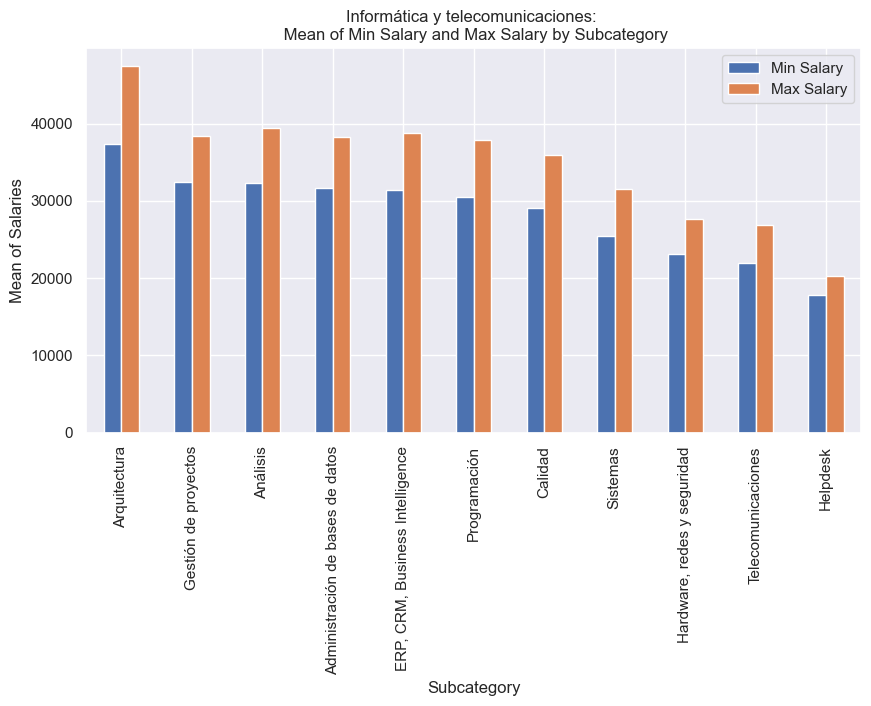

In [110]:
(df_final
        .query('category == "Informática y telecomunicaciones"')
        .groupby('subcategory')
        .agg(
        {
            'salaryMin': 'mean',
            'salaryMax': 'mean'
        }
        )
        .sort_values('salaryMin', ascending=False)
        .rename(columns={
                'salaryMin': 'Min Salary', 
                'salaryMax': 'Max Salary'
                }
            )
        .plot(
            kind='bar',
            title='Informática y telecomunicaciones: \n Mean of Min Salary and Max Salary by Subcategory',
            xlabel='Subcategory',
            ylabel='Mean of Salaries',
            figsize=(10,5)
        )
)

<Axes: title={'center': 'Top 10 Most Demanding Provinces'}, xlabel='Amount of offers', ylabel='Province'>

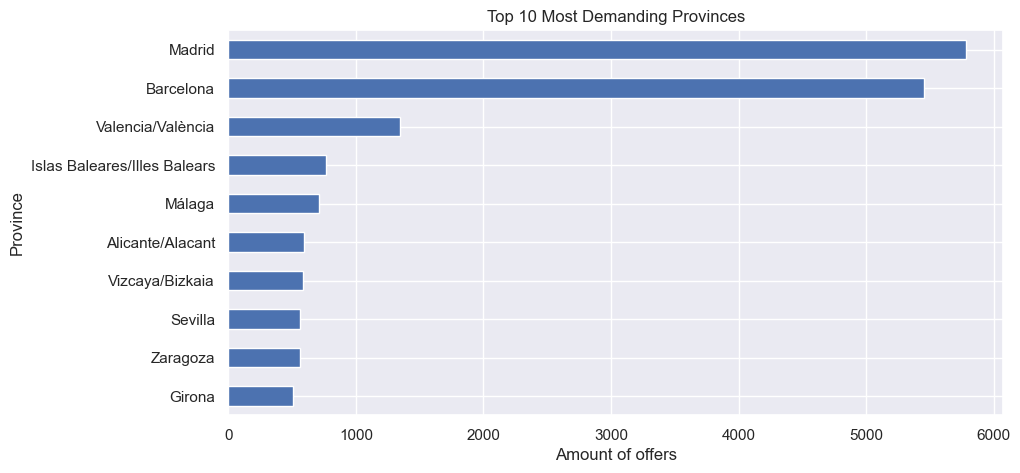

In [111]:
(df_final
    .groupby('province')
    .title
    .count()
    .sort_values(ascending=True)
    .tail(10)
    .plot(
        kind='barh',
        title='Top 10 Most Demanding Provinces',
        xlabel='Amount of offers',
        ylabel='Province',
        figsize=(10,5)
    )
)

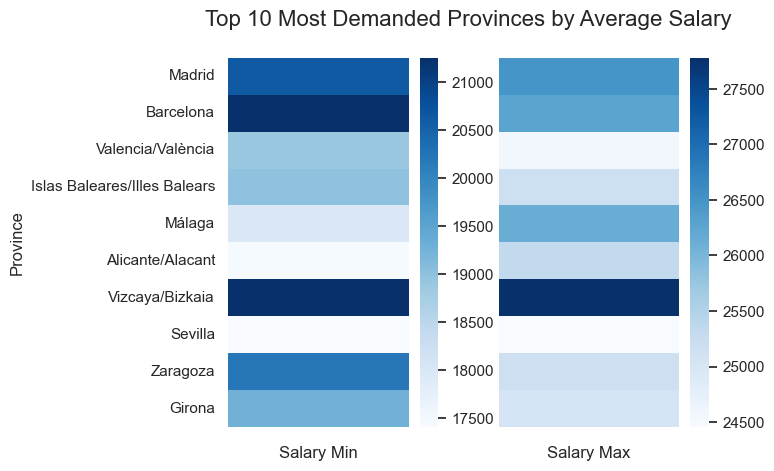

In [112]:
df_plot = (df_final
            .assign(
                provinceCount = lambda df: df.groupby('province').province.transform('count')
            )
            .pivot_table(
                index='province', 
                values=['salaryMin', 'salaryMax', 'provinceCount'], 
                aggfunc='mean'
                )
            .sort_values(by='provinceCount', ascending=False)
            .drop(columns=['provinceCount'])
            .head(10)
)

plot_salary_heatmap(df_plot, group_by='Province', title='Top 10 Most Demanded Provinces by Average Salary')


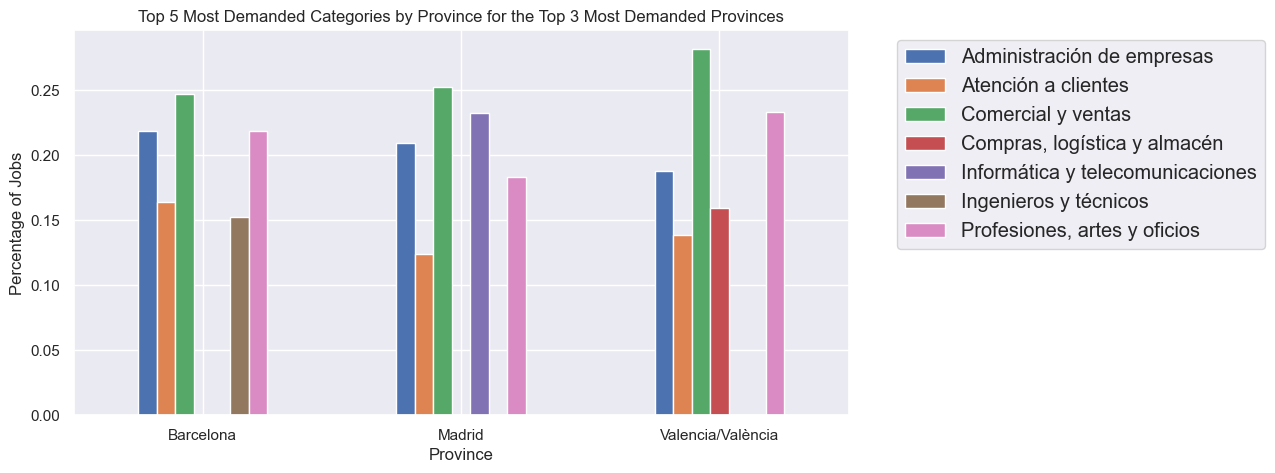

In [113]:
(df_final
    .query('category != "Otros"')
    .groupby(['province', 'category'])
    .title
    .count()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .loc[lambda df: df.index.get_level_values(0).isin(df_final.province.value_counts().nlargest(3).index)]
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .unstack()
    .plot(
        kind='bar', 
        stacked=False, 
        title='Top 5 Most Demanded Categories by Province for the Top 3 Most Demanded Provinces',
        xlabel='Province',
        ylabel='Percentage of Jobs',
        figsize=(10, 5),
        rot=0
        )
    .legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
)